## Model

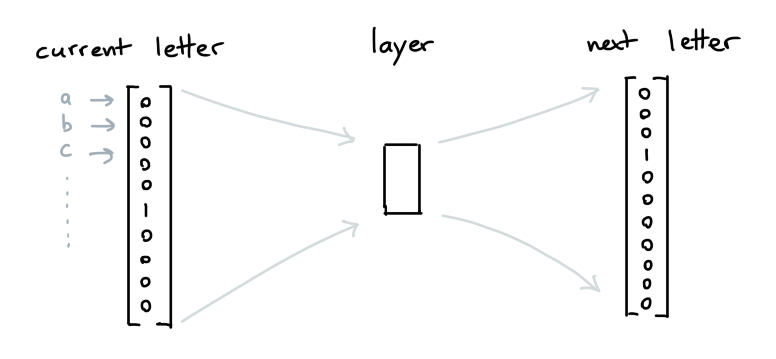

## Before and After

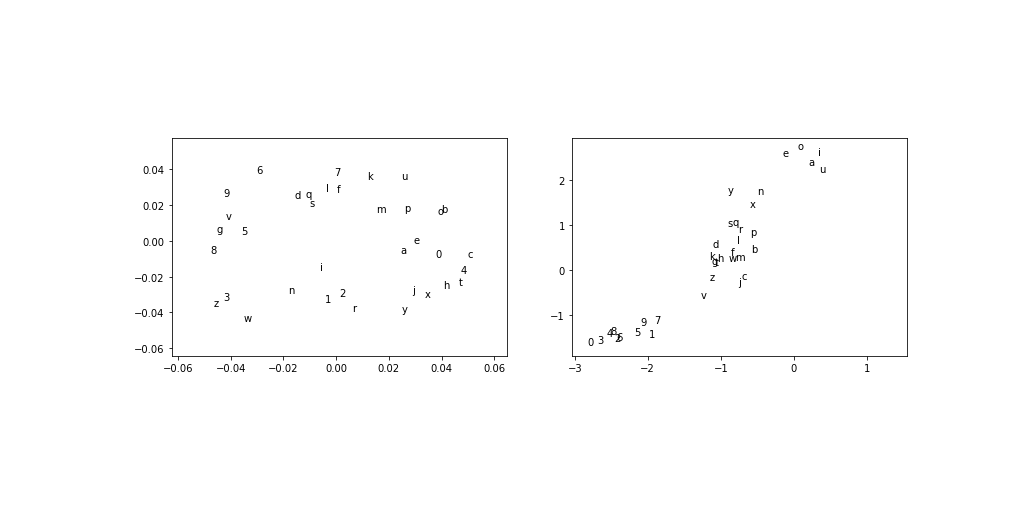

## Great Questions 

In case the case of letters we can say in hindsight that it indeed seems to capture something that relevant. 

Can we expect something similar to happen when we repeat the execise but with words in sentences, as opposed to characters in words. 

## Enter Pretrained Models

In [1]:
from whatlies import Embedding, EmbeddingSet
from whatlies.language import SpacyLanguage

lang_md = SpacyLanguage("nl_core_news_md")

Slow version of gensim.models.doc2vec is being used
2022-01-12 15:13:07.440248: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-12 15:13:07.440270: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/vincent/Development/whatlies/venv/lib/python3.7/site-packages/spacy/util.py:833: UserWarning: [W095] Model 'nl_core_news_md' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


These are the `.vector` features

In [3]:
words = ["kat", "hond", "muis", "tafel", "stoel", "bank", "regen", "sneeuw", "wind"]

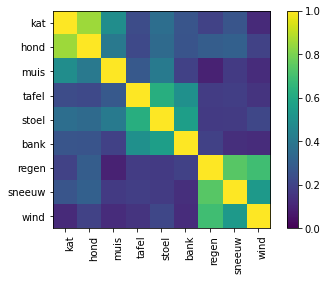

In [5]:
lang_md[words].plot_similarity()

In [11]:
lang_md = SpacyLanguage("en_core_web_md")

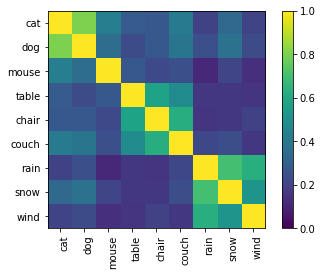

In [13]:
words = ["cat", "dog", "mouse", "table", "chair", "couch", "rain", "snow", "wind"]

lang_md[words].plot_similarity()

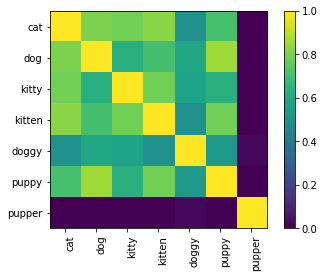

In [24]:
words = ["cat", "dog", "kitty", "kitten", "doggy", "puppy", "pupper"]

lang_md[words].plot_similarity()

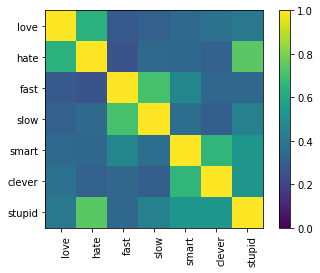

In [25]:
words = ["love", "hate", "fast", "slow", "smart", "clever", "stupid"]

lang_md[words].plot_similarity()

Let's apply some dimensionality reduction just for fun. 

In [34]:
from whatlies.transformers import Umap 

words = ["love", "hate", "fast", "slow", "smart", "clever", "stupid", 
         "cat", "dog", "kitty", "kitten", "doggy", "puppy", "pupper", 
         "man", "woman", "king", "queen", "brother", "sister", "nephew",
         "swim", "jump", "run", "swimming", "running", "walking", "dancing"]

lang_md[words].transform(Umap(2)).plot_brush()

alt.HConcatChart(...)

There's another way to think about similarity.

In [38]:
lang_md.score_similar("dog", prob_limit=-20,)

[(Emb[kennel], 1.1920928955078125e-07),
 (Emb[dog], 1.1920928955078125e-07),
 (Emb[canine], 1.1920928955078125e-07),
 (Emb[hound], 1.1920928955078125e-07),
 (Emb[mutts], 0.11640691757202148),
 (Emb[canines], 0.11640691757202148),
 (Emb[dogs], 0.11640691757202148),
 (Emb[greyhounds], 0.11640691757202148),
 (Emb[puppy], 0.14147859811782837),
 (Emb[terrier], 0.14147859811782837)]

In [39]:
lang_md.score_similar("cat", prob_limit=-20,)

[(Emb[feline], 1.1920928955078125e-07),
 (Emb[cat], 1.1920928955078125e-07),
 (Emb[felines], 0.1590244174003601),
 (Emb[cats], 0.1590244174003601),
 (Emb[moggie], 0.17844462394714355),
 (Emb[ragdoll], 0.17844462394714355),
 (Emb[kitten/cat], 0.17844462394714355),
 (Emb[tortie], 0.17844462394714355),
 (Emb[kitten], 0.17844462394714355),
 (Emb[moggy], 0.17844462394714355)]

In [40]:
lang_md.score_similar("fast", prob_limit=-20,)

[(Emb[fast], 0.0),
 (Emb[faster], 0.24647724628448486),
 (Emb[quicky], 0.28993725776672363),
 (Emb[quick], 0.28993725776672363),
 (Emb[slow], 0.2905101180076599),
 (Emb[easy], 0.34259843826293945),
 (Emb[high-speed], 0.3436771035194397),
 (Emb[speeed], 0.3436771035194397),
 (Emb[spped], 0.3436771035194397),
 (Emb[speed], 0.3436771035194397)]

## One things that's nice!

These methods are scikit-learn compatible! 

In [26]:
import numpy as np
from whatlies.language import SpacyLanguage
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("embed", SpacyLanguage("en_core_web_md")),
    ("model", LogisticRegression())
])

X = [
    "i really like this post",
    "thanks for that comment",
    "i enjoy this friendly forum",
    "this is a bad post",
    "i dislike this article",
    "this is not well written"
]

y = np.array([1, 1, 1, 0, 0, 0])

pipe.fit(X, y)

Pipeline(steps=[('embed', SpacyLanguage(nlp='en_core_web_md')),
                ('model', LogisticRegression())])

In [29]:
pipe.predict_proba(["nice"])

array([[0.14581556, 0.85418444]])

## A trick! 

But how do we deal with spelling errors? 

In [41]:
lang_md.score_similar("zerglingmatosis", prob_limit=-20,)

[(Emb[croup], 1.0),
 (Emb[universelle], 1.0),
 (Emb[gorey], 1.0),
 (Emb[mcleish], 1.0),
 (Emb[datsyuk], 1.0),
 (Emb[polygon], 1.0),
 (Emb[labcorp], 1.0),
 (Emb[eradicate], 1.0),
 (Emb[meeni], 1.0),
 (Emb[publicas], 1.0)]

Let's try another set of embeddings.

In [2]:
from whatlies.language import BytePairLanguage

BytePairLanguage("en").score_similar("zerglingmatosis")

[(Emb[▁disease], 0.2885706455925101),
 (Emb[▁symptoms], 0.2940858583502348),
 (Emb[▁neuro], 0.30190789706220067),
 (Emb[▁diagn], 0.3088914203067741),
 (Emb[▁syndrome], 0.3128298869189181),
 (Emb[▁hyp], 0.3319805178363332),
 (Emb[▁diseases], 0.33388768415820613),
 (Emb[▁brain], 0.341628862329985),
 (Emb[▁disorder], 0.35653906888828213),
 (Emb[▁patients], 0.3681800498797916)]

That's pretty dang cool! It seems to understand something about the word ... even though it does not exist! This suggests that we can go beyond lookup-based word embeddings! 

In [4]:
# Could we try this for Slovenian?

BytePairLanguage("sl").score_similar("zergosmoza")

[(Emb[roza], 0.21508584242647655),
 (Emb[zs], 0.24115774639026144),
 (Emb[ros], 0.2481126909807232),
 (Emb[zy], 0.249594192734243),
 (Emb[mas], 0.2498443213541831),
 (Emb[mos], 0.25053489270764273),
 (Emb[dem], 0.2596623592225915),
 (Emb[demi], 0.2634750676026463),
 (Emb[lago], 0.2652301301146661),
 (Emb[redoto], 0.26962735711923314)]

## Sentence Embeddings? 

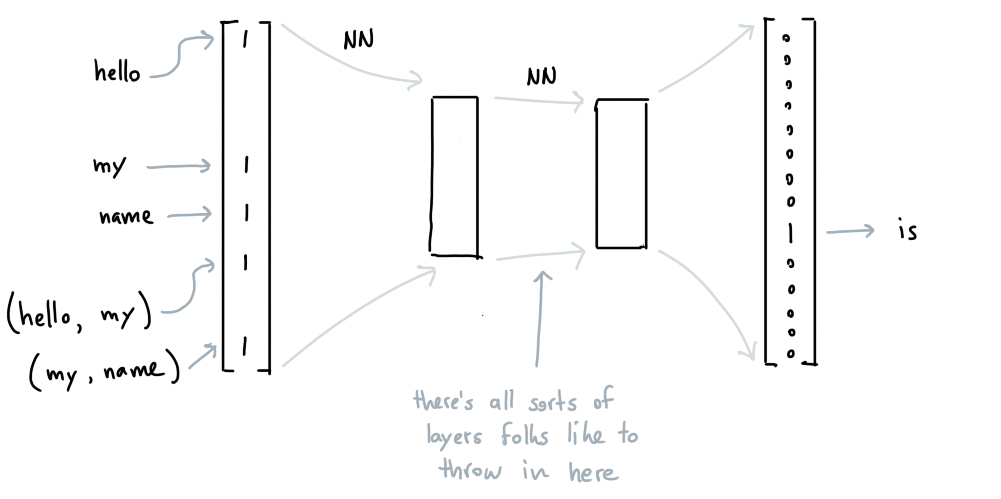

Want to know more? 

On behalf of Rasa I maitain a playlist of NLP material. It's about 52 episodes now and there's plenty of topics to explore. 

Find it [here](https://www.youtube.com/watch?v=yGTUuEx3GkA&list=PL75e0qA87dlG-za8eLI6t0_Pbxafk-cxb&index=90).

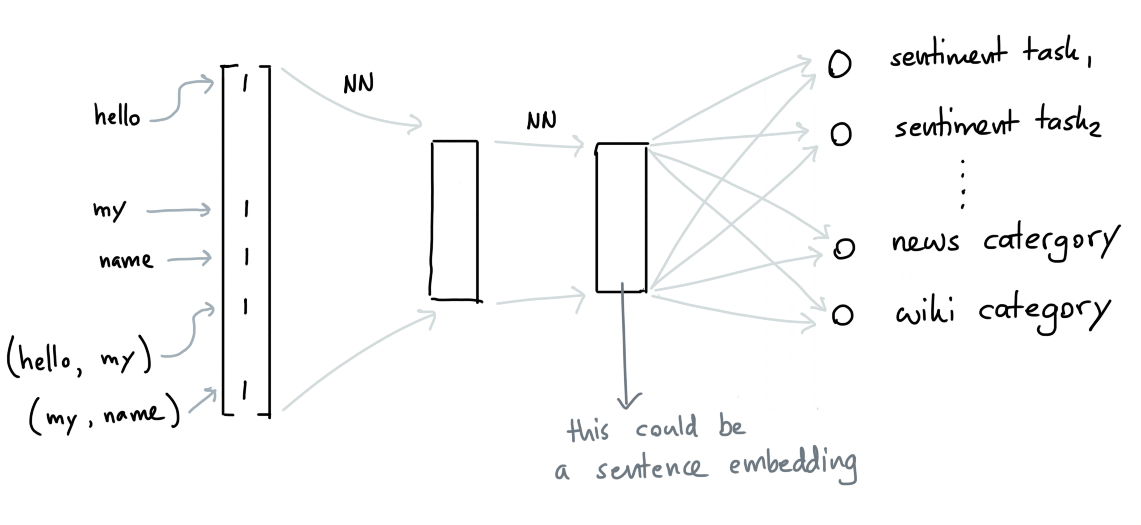